# Sales Analysis

#### Import necessary libraries

In [42]:
import os
import pandas as pd
import numpy as np

#### Merge data from each month into one CSV

In [5]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

In [7]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [9]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##### Get rid of text in order date column

In [12]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [15]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [19]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Add month column (alternative method)

In [22]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_59471/1522122304.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,12


#### Add city column

In [25]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,12,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,12,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,12,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,12,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,12,Atlanta (GA)


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [29]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [31]:
all_data.groupby(['Month']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,City,Sales
Month,,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",9709,Dallas (TX)New York City (NY)New York City ...,1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",23950,Portland (ME)San Francisco (CA)New York City...,2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",45459,San Francisco (CA)Portland (OR)San Francisco...,2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",73116,Dallas (TX)Boston (MA)Los Angeles (CA)Los A...,3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",82830,Portland (OR)San Francisco (CA)Boston (MA)B...,3152606.75
6,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253,2562025.61,06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...",81324,San Francisco (CA)Dallas (TX)San Francisco ...,2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",100051,Atlanta (GA)Seattle (WA)Atlanta (GA)Atlanta...,2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",95688,Seattle (WA)Dallas (TX)Portland (OR)Los Ang...,2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",104589,San Francisco (CA)San Francisco (CA)Seattle ...,2097560.13


range(1, 13)


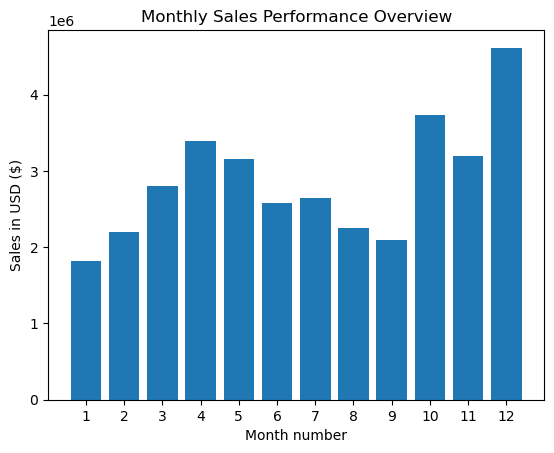

In [33]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Monthly Sales Performance Overview')
plt.show()



#### Question 2: What city sold the most product?

In [44]:
all_data.groupby(['City']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales
City,,,,,,,,,
Atlanta (GA),2956692956932957102957372957372957562957602957...,USB-C Charging CableWired HeadphonesAAA Batter...,16602,2779908.20,12/18/19 12:3812/16/19 16:4012/26/19 19:0912/1...,"43 Hill St, Atlanta, GA 30301856 12th St, Atla...",104794,104794,2795498.58
Austin (TX),2956802957022957032957032957542957892957982958...,Lightning Charging CableWired HeadphonesAA Bat...,11153,1809873.61,12/01/19 14:3012/21/19 18:5012/17/19 12:2712/1...,"338 Main St, Austin, TX 73301628 River St, Aus...",69829,69829,1819581.75
Boston (MA),2956772956812956812956812956812956872956952957...,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,22528,3637409.77,12/20/19 19:1912/25/19 12:3712/25/19 12:3712/2...,"866 Pine St, Boston, MA 0221579 Elm St, Boston...",141112,141112,3661642.01
Dallas (TX),2956722956732956742956782956792956942957242957...,USB-C Charging CableBose SoundSport Headphones...,16730,2752627.82,12/13/19 09:2912/15/19 23:2612/28/19 11:5112/0...,"813 Hickory St, Dallas, TX 75001718 Wilson St,...",104620,104620,2767975.40
Los Angeles (CA),2956762956882956912956922957062957142957162957...,ThinkPad LaptopApple Airpods HeadphonesBose So...,33289,5421435.23,12/28/19 17:1912/08/19 11:2112/22/19 18:3412/1...,"410 Lincoln St, Los Angeles, CA 90001546 Park ...",208325,208325,5452570.80
New York City (NY),2956652956662956672956702956982956982957002957...,Macbook Pro LaptopLG Washing MachineUSB-C Char...,27932,4635370.83,12/30/19 00:0112/29/19 07:0312/12/19 18:2112/3...,"136 Church St, New York City, NY 10001562 2nd ...",175741,175741,4664317.43
Portland (ME),2956862957972958622960182961272961582962062962...,USB-C Charging CableWired HeadphonesAAA Batter...,2750,447189.25,12/17/19 16:1012/16/19 09:2312/03/19 14:2212/2...,"573 Maple St, Portland, ME 04101163 Washington...",17144,17144,449758.27
Portland (OR),2956712956822957342957572958192958572958922958...,USB-C Charging CableUSB-C Charging CableAAA Ba...,11303,1860558.22,12/16/19 15:1012/23/19 19:2512/25/19 12:3812/0...,"928 12th St, Portland, OR 97035780 Elm St, Por...",70621,70621,1870732.34
San Francisco (CA),2956682956752956832956842956852956892956962956...,27in FHD MonitorUSB-C Charging CableWired Head...,50239,8211461.74,12/22/19 15:1312/13/19 13:5212/23/19 22:4612/0...,"410 6th St, San Francisco, CA 94016594 1st St,...",315520,315520,8262203.91


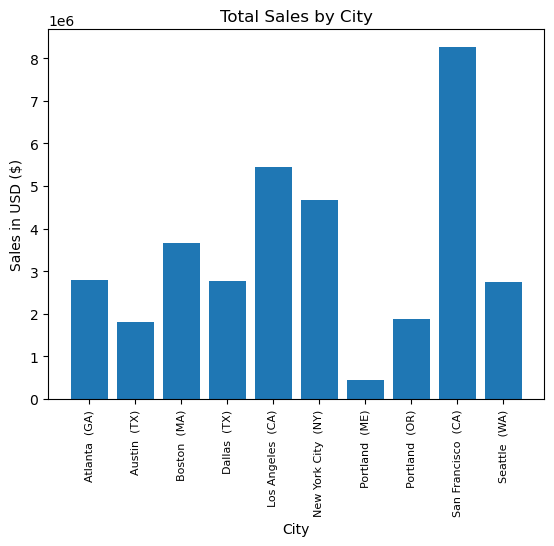

In [54]:
import matplotlib.pyplot as plt

# keys = [city for city, df in all_data.groupby(['City'])]
keys = list(all_data.groupby(['City']).sum().index)

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.xticks(keys, rotation = 'vertical', size = 8)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [56]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_59471/2818534198.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_59471/2818534198.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,12,New York City (NY),1700.00,0,1,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,12,New York City (NY),600.00,7,3,1
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,12,New York City (NY),11.95,18,21,1
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,12,San Francisco (CA),149.99,15,13,1
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,12,Atlanta (GA),11.95,12,38,1


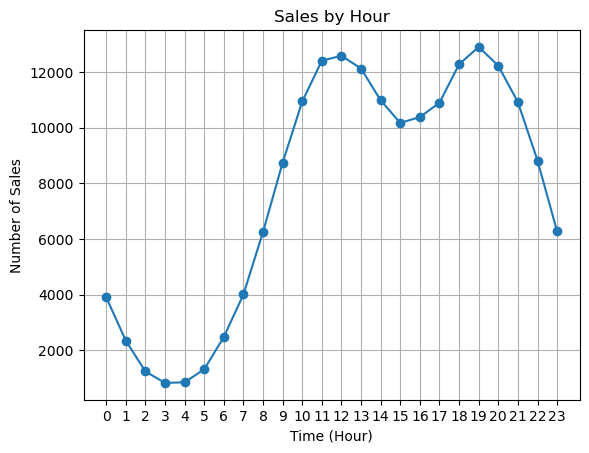

In [60]:
keys = list(all_data.groupby(['Hour']).size().index)

plt.plot(keys, all_data.groupby(['Hour']).size(), marker='o', linestyle='-')

plt.xticks(keys)  
plt.ylabel('Number of Sales')
plt.xlabel('Time (Hour)')
plt.title('Sales by Hour')
plt.grid()

plt.show()

#### Question 4: What products are most often sold together?

In [62]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

/var/folders/dp/0zq5h63j5ls75dtq6pn2d6r00000gn/T/ipykernel_59471/3772502071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [64]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### What product sold the most? Why do you think it sold the most?

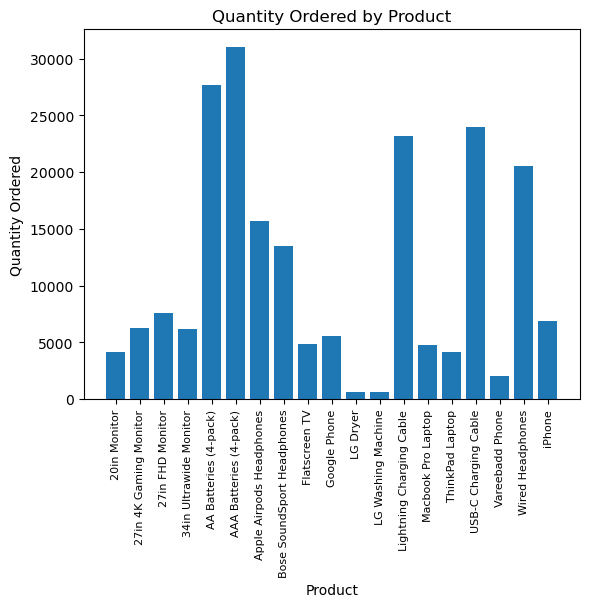

In [66]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.title('Quantity Ordered by Product')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

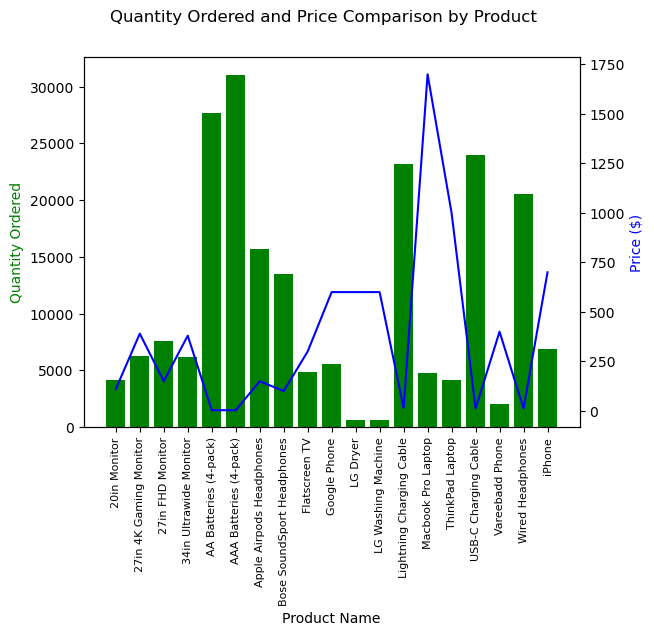

In [80]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')


prices = all_data.groupby('Product')['Price Each'].mean()
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()


keys = list(prices.index)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticks(range(len(keys)))
ax1.set_xticklabels(keys, rotation='vertical', size=8)
fig.suptitle("Quantity Ordered and Price Comparison by Product")

plt.show()
 
